## Runnig the Hironao Miyatake's code  

- https://github.com/HironaoMiyatake/WLProfileFit
- NFW, shape noise, mcmc 

In [1]:
#!/usr/bin/env python
#=============================
# author: Maria Elidaiana
# email: mariaeli@brandeis.edu
#=============================

import numpy as np
import matplotlib.pyplot as plt
from time import clock

%matplotlib inline


In [2]:
cluster = np.loadtxt('test.dat') #Generated with generateTestData.py

print 'r[Mpc/h]\t dSigma[h Msun/pc^2]\t dSigma_err[h Msun/pc^2]'
print cluster


r[Mpc/h]	 dSigma[h Msun/pc^2]	 dSigma_err[h Msun/pc^2]
[[  1.21802591e-01   1.88757039e+02   3.79976995e+02]
 [  1.72050733e-01   1.76765148e+02   2.69003111e+02]
 [  2.43028120e-01   1.60747015e+02   1.90439619e+02]
 [  3.43286344e-01   1.40888732e+02   1.34820925e+02]
 [  4.84904849e-01   1.18228355e+02   9.54459057e+01]
 [  6.84946305e-01   9.45504574e+01   6.75705266e+01]
 [  9.67512371e-01   7.19202076e+01   4.78362694e+01]
 [  1.36664755e+00   5.20755897e+01   3.38654853e+01]
 [  1.93044097e+00   3.60042826e+01   2.39749275e+01]
 [  2.72682035e+00   2.38776865e+01   1.69729489e+01]
 [  3.85173613e+00   1.52691046e+01   1.20159276e+01]
 [  5.44072189e+00   9.46428457e+00   8.50662530e+00]
 [  7.68522394e+00   5.71365619e+00   6.02222952e+00]
 [  1.08556674e+01   3.37393765e+00   4.26341200e+00]
 [  1.53340377e+01   1.95580233e+00   3.01826455e+00]
 [  2.16599040e+01   1.11630855e+00   2.13676767e+00]
 [  3.05954276e+01   6.28912683e-01   1.51271566e+00]
 [  4.32171902e+01   3.5044

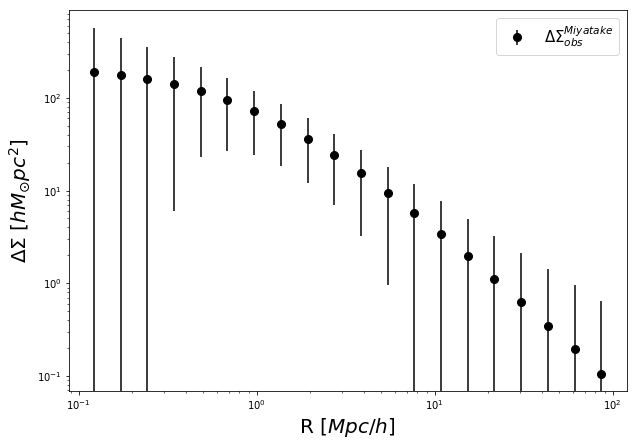

In [3]:
#Plotting the data
r, dSigma, dSigma_err = cluster[:,0], cluster[:,1], cluster[:,2]

plt.figure(1, figsize=(10,7))
plt.errorbar(r, dSigma, dSigma_err,mec='k', c='k', ls='', marker='o', ms=8, label=r"$\Delta\Sigma_{obs}^{Miyatake}$")
plt.xscale("log",  nonposx='clip')
plt.yscale("log",  nonposy='clip')
plt.xlabel(r'R [$Mpc/h$]', fontsize=20)
plt.ylabel(r'$\Delta\Sigma$ [$hM_{\odot}pc^2$]', fontsize=20)
plt.legend(loc = 0, fontsize=15)

initial=clock() # mcmc starts below...


In [4]:
#Running MCMC to fit M200m and C200m
%run mcmc_NFW.py test.dat


output directory: fit_NFW_test.dat
1/10 bunch completed. File written in fit_NFW_test.dat/chains.npy
2/10 bunch completed. File written in fit_NFW_test.dat/chains.npy
3/10 bunch completed. File written in fit_NFW_test.dat/chains.npy
4/10 bunch completed. File written in fit_NFW_test.dat/chains.npy
5/10 bunch completed. File written in fit_NFW_test.dat/chains.npy
6/10 bunch completed. File written in fit_NFW_test.dat/chains.npy
7/10 bunch completed. File written in fit_NFW_test.dat/chains.npy
8/10 bunch completed. File written in fit_NFW_test.dat/chains.npy
9/10 bunch completed. File written in fit_NFW_test.dat/chains.npy
10/10 bunch completed. File written in fit_NFW_test.dat/chains.npy


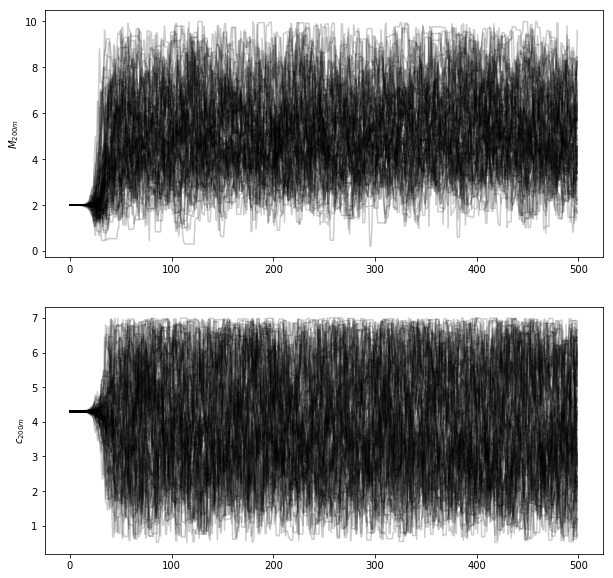

In [5]:
#Showing the chains
%run show_chains_NFW.py fit_NFW_test.dat/chains.npy


In [6]:
#Cutting out chains before burn-in. In this case, the first 100 chains will be removed.
#The output file is created at fit_NFW_test.dat/chains.burnin100.npy
%run cutout_burn_in.py fit_NFW_test.dat 100


file written in: fit_NFW_test.dat/chains.burnin100.npy
file written in: fit_NFW_test.dat/lnprobabilities.burnin100.npy


M [10^14 Msun/h]: (5.0743416017761085, 1.8869583731347319, 1.5756368325400949)
c: (3.9540489644993775, 1.878211651859881, 1.6534206365378852)
file written in: fit_NFW_test.dat/contour.png


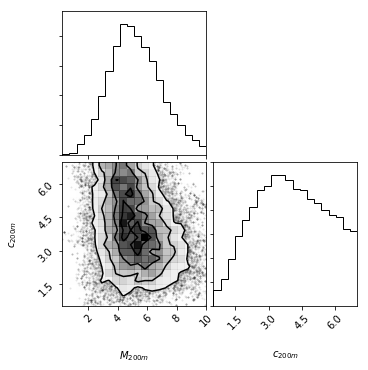

In [7]:
#Plotting the contour
%run plot_triangle_NFW.py fit_NFW_test.dat/chains.burnin100.npy

minimum chi2 from chains: 1.31359967755e-05
chi2/dof: 0.01/9 = 0.00065243133361
file written in: fit_NFW_test.dat/data_model.png
file written in: fit_NFW_test.dat/model.dat


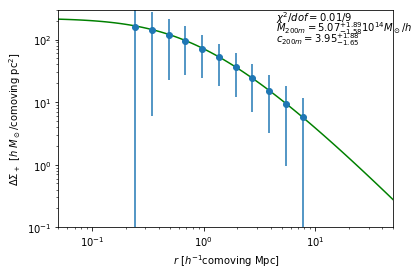

Running time of Miyatake's code: 5.681091 seconds


In [8]:
# Plotting the fitting curve with the data points
%run plot_fit_NFW.py fit_NFW_test.dat/chains.burnin100.npy

final=clock()
print "Running time of Miyatake's code:", final-initial, 'seconds'